# Select Features 
---

In [72]:
from src.utils.select_features import SelectKBest_, Embedded
from src.modeling.modelpipline import ModelPipline
from sklearn.preprocessing import StandardScaler 
import pandas as pd 
import numpy as np 

In [79]:
train = pd.read_csv("./data/processed/train.csv")
train = train[train.year == 2014]

n_ = train.shape[0]
n_train = int(n_*.6)
n_val = int(n_*.2)

x_train, x_val, x_test, y_train, y_val, y_test = \
train.drop(["y"], axis=1).iloc[:n_train, :], train.drop(["y"], axis=1).iloc[n_train:n_val+n_train, :], train.drop(["y"], axis=1).iloc[n_val+n_train:, :], \
train[["y"]].iloc[:n_train, :], train[["y"]].iloc[n_train:n_val+n_train, :], train[["y"]].iloc[n_val+n_train:, :]
print(x_train.shape[0], x_val.shape[0], x_test.shape[0])


107 35 37


/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/kooose/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/feature_

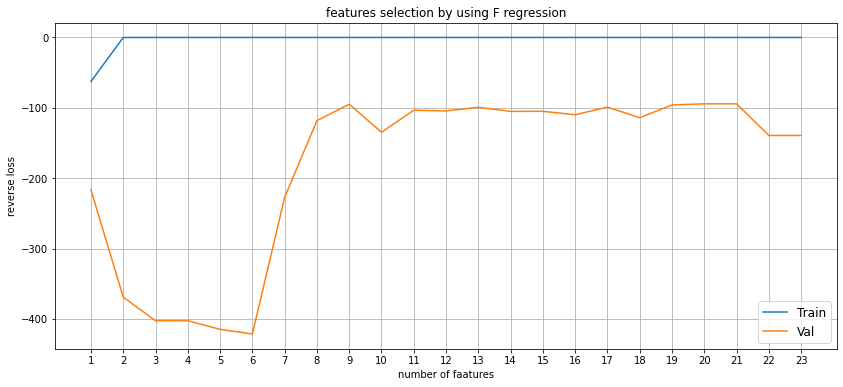

In [93]:
sel = SelectKBest_()
feature = sel.fit(x_train, y_train.values, x_val, y_val.values, model_type="regression")

In [80]:
x_train_s = x_train[feature]
x_val_s = x_val[feature]
x_test_s = x_test[feature]

Scaler = StandardScaler()
x_train_s = Scaler.fit_transform(x_train_s)
x_val_s = Scaler.transform(x_val_s)
x_test_s = Scaler.transform(x_test_s)

model_pip = ModelPipline(model_type="regression")
model_pip.predict(x_train_s, y_train, x_val_s, y_val)

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

In [82]:
embed = Embedded()
feature_tree = embed.fit(x_train, y_train)

x_train_s = x_train[feature_tree]
x_val_s = x_val[feature_tree]
x_test_s = x_test[feature_tree]

Scaler = StandardScaler()
x_train_s = Scaler.fit_transform(x_train_s)
x_val_s = Scaler.transform(x_val_s)
x_test_s = Scaler.transform(x_test_s)

model_pip = ModelPipline(model_type="regression")
model_pip.predict(x_train_s, y_train, x_val_s, y_val)

/home/kooose/.local/lib/python3.8/site-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [121]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
def evaluate_sk(x_train, x_val, x_test, feature, model):
    scaler = StandardScaler()
    x_train_s = scaler.fit_transform(x_train[feature])
    x_val_s = scaler.transform(x_val[feature])
    x_test_s = scaler.transform(x_test[feature])
    
    model.fit(x_train_s, y_train)
    pred_tr = model.predict(x_train_s).reshape(-1, 1)
    pred_va = model.predict(x_val_s).reshape(-1, 1)
    pred_te = model.predict(x_test_s).reshape(-1, 1)
    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("train")
    plt.scatter(np.arange(len(pred_tr)).tolist(), pred_tr-y_train.values)
    plt.plot(np.arange(len(pred_tr)).tolist(), np.zeros(len(pred_tr)), color="r")
    plt.subplot(1, 3, 2)
    plt.title("valid")
    plt.scatter(np.arange(len(pred_va)).tolist(), pred_va-y_val.values)
    plt.plot(np.arange(len(pred_va)).tolist(), np.zeros(len(pred_va)), color="r")
    plt.subplot(1, 3, 3)
    plt.title("test")
    plt.scatter(np.arange(len(pred_te)).tolist(), pred_te-y_test.values)
    plt.plot(np.arange(len(pred_te)).tolist(), np.zeros(len(pred_te)), color="r")

    error_tr = mean_squared_error(pred_tr, y_train)
    error_va = mean_squared_error(pred_va, y_val)
    error = mean_squared_error(pred_te, y_test)
    print(error_tr, error_va, error)

194.1118720089748 164.13395189663407 702.4984786828039


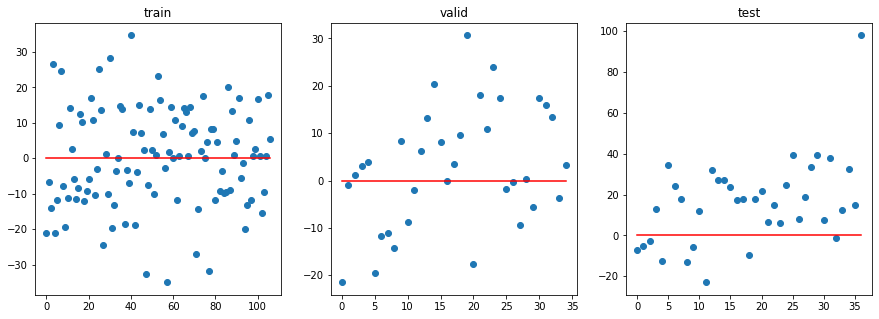

In [122]:
evaluate_sk(x_train, x_val, x_test, feature, LinearRegression())

211.47389372079508 109.4212130487701 260.22931085344067


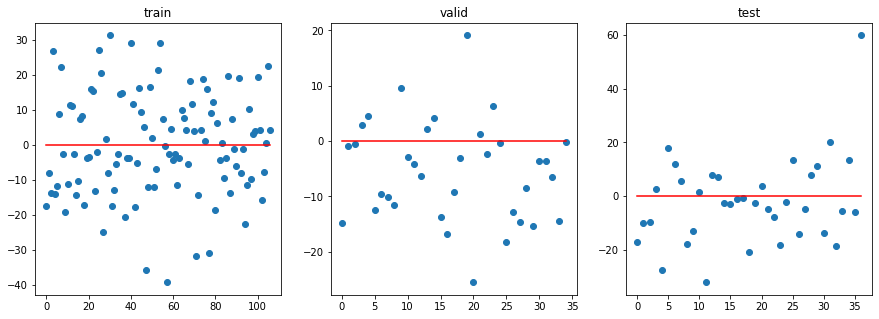

In [160]:
evaluate_sk(x_train, x_val, x_test, feature, Lasso(random_state=0, alpha=0.4, max_iter=10, tol=0.1))

196.159312756896 110.87774336029172 448.006685930064


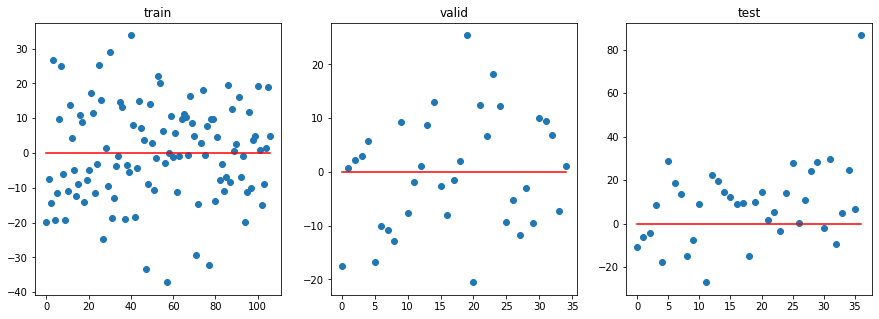

In [124]:
evaluate_sk(x_train, x_val, x_test, feature, Ridge(random_state=0))

[17:01:40] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


6.471379501222868e-07 95.28185039614702 287.67220813293574


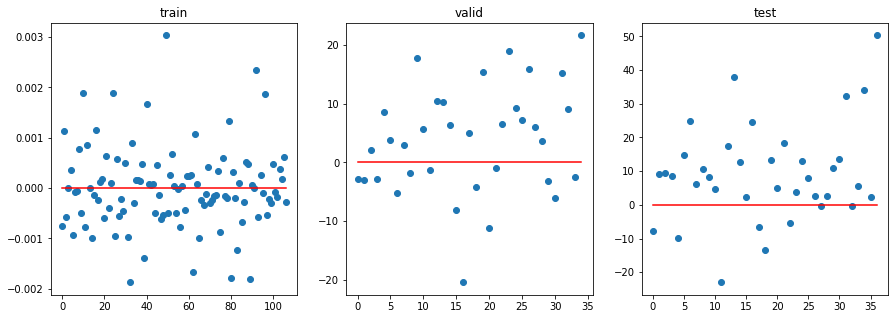

In [135]:
evaluate_sk(x_train, x_val, x_test, feature, XGBRegressor(random_state=0, eval_set=[(x_train[feature], y_train), (x_val[feature], y_val)], early_stopping_rounds=20))

In [127]:
from src.modeling.model_xgb import XGBoost 
import xgboost as xgb 

xgb_ = XGBoost()
model_xgb = xgb_.fit(x_train[feature], y_train, x_val[feature], y_val, methods="regression")


[16:53:38] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:85.67679	eval-rmse:58.54114
[1]	train-rmse:77.83126	eval-rmse:52.54385
[2]	train-rmse:70.69412	eval-rmse:47.31570
[3]	train-rmse:64.21186	eval-rmse:42.49229
[4]	train-rmse:58.77379	eval-rmse:37.97120
[5]	train-rmse:53.74220	eval-rmse:34.52925
[6]	train-rmse:49.03095	eval-rmse:30.97579
[7]	train-rmse:44.92144	eval-rmse:29.74715
[8]	train-rmse:41.19965	eval-rmse:29.03425
[9]	train-rmse:37.70399	eval-rmse:28.15006
[10]	train-rmse:34.60435	eval-rmse:26.27731
[11]	train-rmse:31.86620	eval-rmse:24.63457
[12]	train-rmse:29.31611	eval-rmse:22.84321
[13]	train-rmse:27.00605	eval-rmse:21.12857
[14]	train-rmse:24.83429	eval-rmse:19.98835
[15]	train-rmse:23.028

In [129]:
result = xgb_.parameter_chunning(num_rounds=30, n_trials=30)

import json 
with open("./models/result_xgb_sel_parameters.json", "w") as f:
    json.dump(result["best_parameters"], f)

[I 2021-09-02 16:56:33,340] A new study created in memory with name: no-name-6fefe022-1563-49e1-8f1a-d2c42f3792b1


[16:56:33] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:93.81524	eval-rmse:64.57155
[1]	train-rmse:93.15854	eval-rmse:64.11102
[2]	train-rmse:92.50073	eval-rmse:63.62384
[3]	train-rmse:91.84670	eval-rmse:63.12118
[4]	train-rmse:91.21329	eval-rmse:62.65081
[5]	train-rmse:90.58780	eval-rmse:62.16432
[6]	train-rmse:89.95469	eval-rmse:61.60556
[7]	train-rmse:89.33210	eval-rmse:61.13847
[8]	train-rmse:88.69981	eval-rmse:60.67252
[9]	train-rmse:88.07275	eval-rmse:60.21001
[10]	train-rmse:87.46325	eval-rmse:59.71632
[11]	train-rmse:86.85523	eval-rmse:59.24851
[12]	train-rmse:86.26302	eval-rmse:58.81594
[13]	train-rmse:85.66154	eval-rmse:58.37278
[14]	train-rmse:85.06732	eval-rmse:57.94337
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:33,788] Trial 0 finished with value: 2663.4754986848748 and parameters: {'max_depth': 6, 'colsample_bytree': 0.5190263017695164, 'min_sample_weight': 4.006483661964395, 'gamma': 0.00022859433522173892, 'subsample': 0.7449695777790677, 'alpha': 0.0038333321561566623, 'eta': 0.007501954443620123, 'lambda': 1.7474751375465036}. Best is trial 0 with value: 2663.4754986848748.


[16:56:33] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:94.35464	eval-rmse:64.97193
[1]	train-rmse:94.23344	eval-rmse:64.87845
[2]	train-rmse:94.11382	eval-rmse:64.77660
[3]	train-rmse:93.99017	eval-rmse:64.68272
[4]	train-rmse:93.87466	eval-rmse:64.56709
[5]	train-rmse:93.75812	eval-rmse:64.45046
[6]	train-rmse:93.63833	eval-rmse:64.34096
[7]	train-rmse:93.51829	eval-rmse:64.25283
[8]	train-rmse:93.39576	eval-rmse:64.16188
[9]	train-rmse:93.27396	eval-rmse:64.07098
[10]	train-rmse:93.15559	eval-rmse:63.95252
[11]	train-rmse:93.03359	eval-rmse:63.86118
[12]	train-rmse:92.91725	eval-rmse:63.74478
[13]	train-rmse:92.79864	eval-rmse:63.62611
[14]	train-rmse:92.67705	eval-rmse:63.52795
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:34,034] Trial 1 finished with value: 3849.418333761281 and parameters: {'max_depth': 9, 'colsample_bytree': 0.24179177243329464, 'min_sample_weight': 6.190490166774185, 'gamma': 0.0001702783205227671, 'subsample': 0.801994197228042, 'alpha': 0.05039489598671213, 'eta': 0.0013869861245357324, 'lambda': 4.072912667361452e-06}. Best is trial 0 with value: 2663.4754986848748.


[16:56:34] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:93.73044	eval-rmse:64.49706
[1]	train-rmse:92.99087	eval-rmse:63.93793
[2]	train-rmse:92.25953	eval-rmse:63.39232
[3]	train-rmse:91.53107	eval-rmse:62.84196
[4]	train-rmse:90.81626	eval-rmse:62.28518
[5]	train-rmse:90.10400	eval-rmse:61.75463
[6]	train-rmse:89.39468	eval-rmse:61.21914
[7]	train-rmse:88.69145	eval-rmse:60.68844
[8]	train-rmse:87.99425	eval-rmse:60.16252
[9]	train-rmse:87.30174	eval-rmse:59.64132
[10]	train-rmse:86.62480	eval-rmse:59.05719
[11]	train-rmse:85.94596	eval-rmse:58.54777
[12]	train-rmse:85.27211	eval-rmse:58.05195
[13]	train-rmse:84.60830	eval-rmse:57.56059
[14]	train-rmse:83.94592	eval-rmse:57.06350
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:34,215] Trial 2 finished with value: 2511.229643870452 and parameters: {'max_depth': 3, 'colsample_bytree': 0.6801737161546002, 'min_sample_weight': 6.000075993611755, 'gamma': 0.09122149510449752, 'subsample': 0.9891371330641394, 'alpha': 0.015726578854179506, 'eta': 0.008374496868436816, 'lambda': 0.29087355177892615}. Best is trial 2 with value: 2511.229643870452.


[16:56:34] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:94.18078	eval-rmse:64.84132
[1]	train-rmse:93.88741	eval-rmse:64.61833
[2]	train-rmse:93.59675	eval-rmse:64.37264
[3]	train-rmse:93.29697	eval-rmse:64.14352
[4]	train-rmse:93.00925	eval-rmse:63.91125
[5]	train-rmse:92.72716	eval-rmse:63.67283
[6]	train-rmse:92.43675	eval-rmse:63.43026
[7]	train-rmse:92.14812	eval-rmse:63.21877
[8]	train-rmse:91.85545	eval-rmse:63.00088
[9]	train-rmse:91.56203	eval-rmse:62.78360
[10]	train-rmse:91.27325	eval-rmse:62.55248
[11]	train-rmse:90.98253	eval-rmse:62.33583
[12]	train-rmse:90.69582	eval-rmse:62.08873
[13]	train-rmse:90.40858	eval-rmse:61.87205
[14]	train-rmse:90.12360	eval-rmse:61.66709
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:34,424] Trial 3 finished with value: 3412.660303521627 and parameters: {'max_depth': 3, 'colsample_bytree': 0.436436456821403, 'min_sample_weight': 1.3910837820057878, 'gamma': 0.36087046265775286, 'subsample': 0.7832901189773454, 'alpha': 0.00045566719139214756, 'eta': 0.0033815142678202898, 'lambda': 0.2628063327422689}. Best is trial 2 with value: 2511.229643870452.


[16:56:34] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:87.68160	eval-rmse:60.02411
[1]	train-rmse:81.46646	eval-rmse:55.26143
[2]	train-rmse:75.79719	eval-rmse:50.51059
[3]	train-rmse:70.37974	eval-rmse:46.51344
[4]	train-rmse:65.60565	eval-rmse:42.80049
[5]	train-rmse:61.29955	eval-rmse:39.33824
[6]	train-rmse:57.15139	eval-rmse:36.47178
[7]	train-rmse:53.38666	eval-rmse:35.03493
[8]	train-rmse:49.78062	eval-rmse:32.68584
[9]	train-rmse:46.47945	eval-rmse:31.01477
[10]	train-rmse:43.43731	eval-rmse:28.95128
[11]	train-rmse:40.61892	eval-rmse:27.08854
[12]	train-rmse:38.02005	eval-rmse:25.01314
[13]	train-rmse:35.63960	eval-rmse:23.31317
[14]	train-rmse:33.47157	eval-rmse:21.95583
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:34,611] Trial 4 finished with value: 143.429776255164 and parameters: {'max_depth': 6, 'colsample_bytree': 0.3701978983307309, 'min_sample_weight': 1.0442146944938344, 'gamma': 0.0008731401853192552, 'subsample': 0.8202456221234389, 'alpha': 0.002935864364395358, 'eta': 0.07717846862118066, 'lambda': 0.05925733197263172}. Best is trial 4 with value: 143.429776255164.


[16:56:34] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:94.24359	eval-rmse:64.88736
[1]	train-rmse:94.01492	eval-rmse:64.71107
[2]	train-rmse:93.78954	eval-rmse:64.51916
[3]	train-rmse:93.55624	eval-rmse:64.34368
[4]	train-rmse:93.33371	eval-rmse:64.14278
[5]	train-rmse:93.11122	eval-rmse:63.92016
[6]	train-rmse:92.88546	eval-rmse:63.73033
[7]	train-rmse:92.65934	eval-rmse:63.56443
[8]	train-rmse:92.42976	eval-rmse:63.39473
[9]	train-rmse:92.20067	eval-rmse:63.22592
[10]	train-rmse:91.97820	eval-rmse:63.00346
[11]	train-rmse:91.74812	eval-rmse:62.83266
[12]	train-rmse:91.52097	eval-rmse:62.63699
[13]	train-rmse:91.29931	eval-rmse:62.41540
[14]	train-rmse:91.07507	eval-rmse:62.23331
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:34,806] Trial 5 finished with value: 3549.0135824210533 and parameters: {'max_depth': 5, 'colsample_bytree': 0.27354699847778985, 'min_sample_weight': 4.984610132094825, 'gamma': 3.0325206929428826e-08, 'subsample': 0.8434757721213031, 'alpha': 0.004814503186400559, 'eta': 0.0026349059741156123, 'lambda': 7.988846628849496e-06}. Best is trial 4 with value: 143.429776255164.


[16:56:34] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:94.24367	eval-rmse:64.88596
[1]	train-rmse:94.01101	eval-rmse:64.70965
[2]	train-rmse:93.78208	eval-rmse:64.51099
[3]	train-rmse:93.55065	eval-rmse:64.33572
[4]	train-rmse:93.32707	eval-rmse:64.11198
[5]	train-rmse:93.10197	eval-rmse:63.90859
[6]	train-rmse:92.87748	eval-rmse:63.70579
[7]	train-rmse:92.64927	eval-rmse:63.53581
[8]	train-rmse:92.42084	eval-rmse:63.36331
[9]	train-rmse:92.19422	eval-rmse:63.19552
[10]	train-rmse:91.97292	eval-rmse:62.97419
[11]	train-rmse:91.74662	eval-rmse:62.80422
[12]	train-rmse:91.52702	eval-rmse:62.58464
[13]	train-rmse:91.30910	eval-rmse:62.36676
[14]	train-rmse:91.08702	eval-rmse:62.18353
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:35,010] Trial 6 finished with value: 3535.040555879043 and parameters: {'max_depth': 5, 'colsample_bytree': 0.2310525526558111, 'min_sample_weight': 3.717036026537111, 'gamma': 3.227097654537013e-05, 'subsample': 0.9940786592269085, 'alpha': 2.559642090152664e-05, 'eta': 0.0026166974560854475, 'lambda': 1.3463768176041092e-05}. Best is trial 4 with value: 143.429776255164.


[16:56:35] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:92.70609	eval-rmse:63.63115
[1]	train-rmse:90.96051	eval-rmse:62.32402
[2]	train-rmse:89.26029	eval-rmse:60.90602
[3]	train-rmse:87.53444	eval-rmse:59.56943
[4]	train-rmse:85.97182	eval-rmse:58.01146
[5]	train-rmse:84.40134	eval-rmse:56.44723
[6]	train-rmse:82.82679	eval-rmse:54.88071
[7]	train-rmse:81.29980	eval-rmse:53.76721
[8]	train-rmse:79.75888	eval-rmse:52.67908
[9]	train-rmse:78.22425	eval-rmse:51.56098
[10]	train-rmse:76.77376	eval-rmse:50.12593
[11]	train-rmse:75.33968	eval-rmse:49.04935
[12]	train-rmse:73.98040	eval-rmse:47.70945
[13]	train-rmse:72.65711	eval-rmse:46.43482
[14]	train-rmse:71.33290	eval-rmse:45.13427
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:35,208] Trial 7 finished with value: 1029.2227956887202 and parameters: {'max_depth': 7, 'colsample_bytree': 0.17918085415441004, 'min_sample_weight': 2.926245594412443, 'gamma': 9.024117386429386e-07, 'subsample': 0.6507564086611658, 'alpha': 2.7637615125314248e-05, 'eta': 0.020542778286285958, 'lambda': 9.274289735409131e-06}. Best is trial 4 with value: 143.429776255164.


[16:56:35] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:86.50794	eval-rmse:59.11200
[1]	train-rmse:79.30701	eval-rmse:53.78879
[2]	train-rmse:72.84356	eval-rmse:48.35165
[3]	train-rmse:66.84098	eval-rmse:43.98313
[4]	train-rmse:61.65307	eval-rmse:38.96143
[5]	train-rmse:56.91611	eval-rmse:34.95032
[6]	train-rmse:52.60538	eval-rmse:31.39844
[7]	train-rmse:48.66900	eval-rmse:29.13818
[8]	train-rmse:45.05621	eval-rmse:26.99941
[9]	train-rmse:41.65918	eval-rmse:25.18506
[10]	train-rmse:38.76443	eval-rmse:22.87129
[11]	train-rmse:36.00683	eval-rmse:21.64701
[12]	train-rmse:33.73996	eval-rmse:19.85945
[13]	train-rmse:31.61733	eval-rmse:18.65242
[14]	train-rmse:29.67786	eval-rmse:18.05274
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:35,421] Trial 8 finished with value: 249.14203022015488 and parameters: {'max_depth': 4, 'colsample_bytree': 0.23373576487028158, 'min_sample_weight': 6.622061805876721, 'gamma': 5.9815013672851e-08, 'subsample': 0.9205519034853793, 'alpha': 2.4232243900608922e-05, 'eta': 0.08972612866432514, 'lambda': 0.0019079123162228998}. Best is trial 4 with value: 143.429776255164.


[16:56:35] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:94.13117	eval-rmse:64.80542
[1]	train-rmse:93.79289	eval-rmse:64.54874
[2]	train-rmse:93.45654	eval-rmse:64.26736
[3]	train-rmse:93.11083	eval-rmse:63.99918
[4]	train-rmse:92.77558	eval-rmse:63.74960
[5]	train-rmse:92.44831	eval-rmse:63.42222
[6]	train-rmse:92.11046	eval-rmse:63.13769
[7]	train-rmse:91.78267	eval-rmse:62.89346
[8]	train-rmse:91.44790	eval-rmse:62.64734
[9]	train-rmse:91.10834	eval-rmse:62.39837
[10]	train-rmse:90.77930	eval-rmse:62.12996
[11]	train-rmse:90.45001	eval-rmse:61.87349
[12]	train-rmse:90.12135	eval-rmse:61.63284
[13]	train-rmse:89.78992	eval-rmse:61.38981
[14]	train-rmse:89.46545	eval-rmse:61.15540
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:35,629] Trial 9 finished with value: 3303.2177661947117 and parameters: {'max_depth': 9, 'colsample_bytree': 0.4025738117667017, 'min_sample_weight': 5.486098228809554, 'gamma': 2.0582699712570616e-08, 'subsample': 0.6932527825611472, 'alpha': 3.025423979924897e-05, 'eta': 0.003910933172251059, 'lambda': 6.7778824524680825e-06}. Best is trial 4 with value: 143.429776255164.


[16:56:35] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:89.65192	eval-rmse:61.16746
[1]	train-rmse:85.14499	eval-rmse:56.66993
[2]	train-rmse:80.90771	eval-rmse:52.45437
[3]	train-rmse:76.86394	eval-rmse:48.97274
[4]	train-rmse:73.21369	eval-rmse:45.37598
[5]	train-rmse:69.70649	eval-rmse:41.94419
[6]	train-rmse:66.25951	eval-rmse:38.89754
[7]	train-rmse:63.03299	eval-rmse:36.91024
[8]	train-rmse:59.84100	eval-rmse:35.01746
[9]	train-rmse:56.85592	eval-rmse:33.12803
[10]	train-rmse:54.23971	eval-rmse:30.71574
[11]	train-rmse:51.65154	eval-rmse:29.19251
[12]	train-rmse:49.35099	eval-rmse:27.16745
[13]	train-rmse:47.27524	eval-rmse:25.55171
[14]	train-rmse:45.29706	eval-rmse:23.96013
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:35,890] Trial 10 finished with value: 263.65271154240264 and parameters: {'max_depth': 7, 'colsample_bytree': 0.12441262970928435, 'min_sample_weight': 1.0489839293581724, 'gamma': 0.006210557393778163, 'subsample': 0.6085573263571322, 'alpha': 0.00029574219389351484, 'eta': 0.055983996159057754, 'lambda': 0.00283455810411157}. Best is trial 4 with value: 143.429776255164.


[16:56:35] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:87.37232	eval-rmse:59.75529
[1]	train-rmse:80.94096	eval-rmse:54.92083
[2]	train-rmse:74.89123	eval-rmse:50.53357
[3]	train-rmse:69.36285	eval-rmse:46.47699
[4]	train-rmse:64.40324	eval-rmse:42.58517
[5]	train-rmse:59.85555	eval-rmse:39.32798
[6]	train-rmse:55.60405	eval-rmse:36.07969
[7]	train-rmse:51.73869	eval-rmse:33.55482
[8]	train-rmse:48.12364	eval-rmse:31.00446
[9]	train-rmse:44.83453	eval-rmse:28.72728
[10]	train-rmse:41.73112	eval-rmse:26.73750
[11]	train-rmse:38.89079	eval-rmse:24.96748
[12]	train-rmse:36.19560	eval-rmse:23.24686
[13]	train-rmse:33.79821	eval-rmse:21.96129
[14]	train-rmse:31.65178	eval-rmse:20.61223
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:36,132] Trial 11 finished with value: 143.47509877592216 and parameters: {'max_depth': 4, 'colsample_bytree': 0.9860960465630069, 'min_sample_weight': 2.2596596608740787, 'gamma': 3.4625586401096294e-06, 'subsample': 0.8776840962828512, 'alpha': 0.0001374641651407281, 'eta': 0.07998970719169957, 'lambda': 0.0024966053245291764}. Best is trial 4 with value: 143.429776255164.


[16:56:36] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:91.64969	eval-rmse:62.94836
[1]	train-rmse:88.94224	eval-rmse:60.91331
[2]	train-rmse:86.33252	eval-rmse:58.84566
[3]	train-rmse:83.76205	eval-rmse:56.93408
[4]	train-rmse:81.32511	eval-rmse:55.03069
[5]	train-rmse:78.96127	eval-rmse:53.27854
[6]	train-rmse:76.64602	eval-rmse:51.54352
[7]	train-rmse:74.43116	eval-rmse:49.92576
[8]	train-rmse:72.25800	eval-rmse:48.33150
[9]	train-rmse:70.15921	eval-rmse:46.78229
[10]	train-rmse:68.09135	eval-rmse:45.31373
[11]	train-rmse:66.08309	eval-rmse:43.87639
[12]	train-rmse:64.12688	eval-rmse:42.54923
[13]	train-rmse:62.23718	eval-rmse:41.24689
[14]	train-rmse:60.48428	eval-rmse:40.09105
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:36,379] Trial 12 finished with value: 657.0602613610972 and parameters: {'max_depth': 5, 'colsample_bytree': 0.9065216518658397, 'min_sample_weight': 2.024599714682778, 'gamma': 4.907203727272342e-06, 'subsample': 0.8708713924648491, 'alpha': 0.00013896557615548244, 'eta': 0.03179853813922512, 'lambda': 0.038152712641517615}. Best is trial 4 with value: 143.429776255164.


[16:56:36] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:86.59479	eval-rmse:59.17670
[1]	train-rmse:79.47323	eval-rmse:53.87962
[2]	train-rmse:72.89500	eval-rmse:49.12313
[3]	train-rmse:66.91919	eval-rmse:44.77043
[4]	train-rmse:61.65314	eval-rmse:40.76910
[5]	train-rmse:56.85907	eval-rmse:37.43312
[6]	train-rmse:52.44395	eval-rmse:34.34239
[7]	train-rmse:48.45836	eval-rmse:31.72511
[8]	train-rmse:44.77006	eval-rmse:29.26200
[9]	train-rmse:41.43716	eval-rmse:27.40943
[10]	train-rmse:38.30764	eval-rmse:25.25141
[11]	train-rmse:35.49562	eval-rmse:23.33280
[12]	train-rmse:32.96704	eval-rmse:21.95124
[13]	train-rmse:30.67731	eval-rmse:20.74487
[14]	train-rmse:28.67355	eval-rmse:19.94186
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:36,652] Trial 13 finished with value: 216.01144721312033 and parameters: {'max_depth': 7, 'colsample_bytree': 0.917027678218495, 'min_sample_weight': 9.58480207351303, 'gamma': 0.003717693991030642, 'subsample': 0.896140353836948, 'alpha': 0.0014167519640805024, 'eta': 0.08874636303199333, 'lambda': 0.00018442306914836552}. Best is trial 4 with value: 143.429776255164.


[16:56:36] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:91.95701	eval-rmse:63.18813
[1]	train-rmse:89.54965	eval-rmse:61.37880
[2]	train-rmse:87.15827	eval-rmse:59.61074
[3]	train-rmse:84.81890	eval-rmse:57.81220
[4]	train-rmse:82.62562	eval-rmse:56.17948
[5]	train-rmse:80.49362	eval-rmse:54.53731
[6]	train-rmse:78.39002	eval-rmse:52.71337
[7]	train-rmse:76.35720	eval-rmse:51.22037
[8]	train-rmse:74.33564	eval-rmse:49.76462
[9]	train-rmse:72.37186	eval-rmse:48.33070
[10]	train-rmse:70.49690	eval-rmse:46.86479
[11]	train-rmse:68.67999	eval-rmse:45.47993
[12]	train-rmse:66.89532	eval-rmse:44.26727
[13]	train-rmse:65.15404	eval-rmse:43.02449
[14]	train-rmse:63.49394	eval-rmse:41.93369
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:36,922] Trial 14 finished with value: 808.8610463414375 and parameters: {'max_depth': 4, 'colsample_bytree': 0.581257019019508, 'min_sample_weight': 2.1607062133271935, 'gamma': 1.2679393633014928e-06, 'subsample': 0.7287055381674339, 'alpha': 8.839989990640736e-05, 'eta': 0.02855485311240764, 'lambda': 0.023587614129641388}. Best is trial 4 with value: 143.429776255164.


[16:56:36] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:92.88892	eval-rmse:63.74559
[1]	train-rmse:91.35015	eval-rmse:62.20643
[2]	train-rmse:89.84636	eval-rmse:60.70326
[3]	train-rmse:88.33342	eval-rmse:59.38825
[4]	train-rmse:86.90475	eval-rmse:57.96261
[5]	train-rmse:85.49457	eval-rmse:56.55667
[6]	train-rmse:84.07749	eval-rmse:55.25891
[7]	train-rmse:82.67333	eval-rmse:54.27259
[8]	train-rmse:81.26552	eval-rmse:53.27984
[9]	train-rmse:79.88159	eval-rmse:52.29608
[10]	train-rmse:78.57234	eval-rmse:50.99855
[11]	train-rmse:77.22634	eval-rmse:50.05657
[12]	train-rmse:75.97047	eval-rmse:48.81574
[13]	train-rmse:74.74025	eval-rmse:47.61140
[14]	train-rmse:73.52854	eval-rmse:46.41849
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:37,192] Trial 15 finished with value: 1078.31497397211 and parameters: {'max_depth': 6, 'colsample_bytree': 0.10711678858728374, 'min_sample_weight': 1.0001845872036021, 'gamma': 0.0038623814498898535, 'subsample': 0.8310892419572966, 'alpha': 0.0013327251966824116, 'eta': 0.018289097673470624, 'lambda': 0.0003268284512886493}. Best is trial 4 with value: 143.429776255164.


[16:56:37] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:90.25089	eval-rmse:61.89808
[1]	train-rmse:86.24220	eval-rmse:58.92432
[2]	train-rmse:82.45753	eval-rmse:55.68826
[3]	train-rmse:78.78459	eval-rmse:52.97298
[4]	train-rmse:75.36756	eval-rmse:50.35169
[5]	train-rmse:72.14695	eval-rmse:47.48998
[6]	train-rmse:69.07463	eval-rmse:45.27919
[7]	train-rmse:66.14640	eval-rmse:43.23607
[8]	train-rmse:63.30888	eval-rmse:41.19458
[9]	train-rmse:60.59744	eval-rmse:39.33612
[10]	train-rmse:58.03571	eval-rmse:37.26889
[11]	train-rmse:55.52908	eval-rmse:35.48643
[12]	train-rmse:53.19372	eval-rmse:33.76041
[13]	train-rmse:51.04311	eval-rmse:31.74094
[14]	train-rmse:48.94635	eval-rmse:30.38391
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:37,469] Trial 16 finished with value: 268.8756678092148 and parameters: {'max_depth': 8, 'colsample_bytree': 0.34329941826128574, 'min_sample_weight': 1.6762931812326844, 'gamma': 1.8132697085094084e-05, 'subsample': 0.9321954196938096, 'alpha': 0.00876883655459777, 'eta': 0.04761984997478832, 'lambda': 5.359346963249949}. Best is trial 4 with value: 143.429776255164.


[16:56:37] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:93.22935	eval-rmse:64.13643
[1]	train-rmse:92.00912	eval-rmse:63.19611
[2]	train-rmse:90.79575	eval-rmse:62.27912
[3]	train-rmse:89.58291	eval-rmse:61.36267
[4]	train-rmse:88.42834	eval-rmse:60.43651
[5]	train-rmse:87.28677	eval-rmse:59.56677
[6]	train-rmse:86.13858	eval-rmse:58.68954
[7]	train-rmse:85.01277	eval-rmse:57.85397
[8]	train-rmse:83.88660	eval-rmse:57.03055
[9]	train-rmse:82.78264	eval-rmse:56.19254
[10]	train-rmse:81.69974	eval-rmse:55.26172
[11]	train-rmse:80.61657	eval-rmse:54.46362
[12]	train-rmse:79.56510	eval-rmse:53.69915
[13]	train-rmse:78.50111	eval-rmse:52.91404
[14]	train-rmse:77.47903	eval-rmse:52.17716
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:37,767] Trial 17 finished with value: 1769.9033728490267 and parameters: {'max_depth': 4, 'colsample_bytree': 0.7463536012729711, 'min_sample_weight': 2.854623110278121, 'gamma': 4.128418936724565e-07, 'subsample': 0.8205631431448427, 'alpha': 0.0007060373521804173, 'eta': 0.014150977596935621, 'lambda': 0.016241084895106707}. Best is trial 4 with value: 143.429776255164.


[16:56:37] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:90.07403	eval-rmse:61.47504
[1]	train-rmse:85.93522	eval-rmse:57.34346
[2]	train-rmse:81.94580	eval-rmse:53.37169
[3]	train-rmse:78.13575	eval-rmse:50.11594
[4]	train-rmse:74.71405	eval-rmse:46.73754
[5]	train-rmse:71.40372	eval-rmse:43.48788
[6]	train-rmse:68.16000	eval-rmse:40.64797
[7]	train-rmse:65.10310	eval-rmse:39.50524
[8]	train-rmse:62.04263	eval-rmse:37.61647
[9]	train-rmse:59.18531	eval-rmse:36.51247
[10]	train-rmse:56.64946	eval-rmse:34.10551
[11]	train-rmse:54.14787	eval-rmse:32.55835
[12]	train-rmse:51.94136	eval-rmse:30.52217
[13]	train-rmse:49.83992	eval-rmse:28.59315
[14]	train-rmse:47.84656	eval-rmse:26.83619
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:38,039] Trial 18 finished with value: 261.37679527025114 and parameters: {'max_depth': 5, 'colsample_bytree': 0.14752546545958756, 'min_sample_weight': 1.3664246625086909, 'gamma': 0.0002549075579000855, 'subsample': 0.7632343714405094, 'alpha': 0.09263461787560899, 'eta': 0.05139536548859938, 'lambda': 0.00030422240226617283}. Best is trial 4 with value: 143.429776255164.


[16:56:38] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:86.26759	eval-rmse:58.94722
[1]	train-rmse:78.96706	eval-rmse:53.42921
[2]	train-rmse:72.34758	eval-rmse:48.01143
[3]	train-rmse:66.16705	eval-rmse:43.32293
[4]	train-rmse:60.79065	eval-rmse:39.51806
[5]	train-rmse:56.05332	eval-rmse:35.68941
[6]	train-rmse:51.47130	eval-rmse:32.49769
[7]	train-rmse:47.50130	eval-rmse:30.99852
[8]	train-rmse:43.84758	eval-rmse:28.74400
[9]	train-rmse:40.36856	eval-rmse:26.50970
[10]	train-rmse:37.32495	eval-rmse:24.63422
[11]	train-rmse:34.65913	eval-rmse:22.95891
[12]	train-rmse:32.21195	eval-rmse:20.93308
[13]	train-rmse:29.98171	eval-rmse:19.57113
[14]	train-rmse:27.97625	eval-rmse:18.55404
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:38,348] Trial 19 finished with value: 155.11344880407185 and parameters: {'max_depth': 8, 'colsample_bytree': 0.3541469606773507, 'min_sample_weight': 2.2010492432295425, 'gamma': 0.030146745454010474, 'subsample': 0.6915898190244942, 'alpha': 0.00013207632012747017, 'eta': 0.09292971845863605, 'lambda': 0.15966505829360325}. Best is trial 4 with value: 143.429776255164.


[16:56:38] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:91.43246	eval-rmse:62.77578
[1]	train-rmse:88.54568	eval-rmse:60.54830
[2]	train-rmse:85.71160	eval-rmse:58.42672
[3]	train-rmse:82.95074	eval-rmse:56.38106
[4]	train-rmse:80.35167	eval-rmse:54.32596
[5]	train-rmse:77.86798	eval-rmse:52.22248
[6]	train-rmse:75.42484	eval-rmse:50.21518
[7]	train-rmse:73.08520	eval-rmse:48.57592
[8]	train-rmse:70.76785	eval-rmse:46.91570
[9]	train-rmse:68.54301	eval-rmse:45.31225
[10]	train-rmse:66.38063	eval-rmse:43.75513
[11]	train-rmse:64.27171	eval-rmse:42.24770
[12]	train-rmse:62.27010	eval-rmse:40.60482
[13]	train-rmse:60.32869	eval-rmse:39.17971
[14]	train-rmse:58.51562	eval-rmse:37.94920
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:38,627] Trial 20 finished with value: 558.1039341166241 and parameters: {'max_depth': 6, 'colsample_bytree': 0.49433080503042987, 'min_sample_weight': 1.3232500112527052, 'gamma': 0.000853336372641998, 'subsample': 0.8639131629375004, 'alpha': 0.0024383131338083282, 'eta': 0.034397831487482176, 'lambda': 0.006681550738553472}. Best is trial 4 with value: 143.429776255164.


[16:56:38] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:86.23549	eval-rmse:58.94109
[1]	train-rmse:78.90180	eval-rmse:53.39677
[2]	train-rmse:72.25536	eval-rmse:47.95672
[3]	train-rmse:66.05322	eval-rmse:43.25102
[4]	train-rmse:60.65900	eval-rmse:39.42643
[5]	train-rmse:55.91094	eval-rmse:35.59074
[6]	train-rmse:51.31964	eval-rmse:32.39429
[7]	train-rmse:47.39007	eval-rmse:30.89722
[8]	train-rmse:43.72957	eval-rmse:28.64346
[9]	train-rmse:40.27921	eval-rmse:26.40973
[10]	train-rmse:37.22641	eval-rmse:24.52906
[11]	train-rmse:34.55838	eval-rmse:22.85671
[12]	train-rmse:32.17475	eval-rmse:20.83644
[13]	train-rmse:29.91891	eval-rmse:19.52276
[14]	train-rmse:27.88215	eval-rmse:18.54244
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:38,913] Trial 21 finished with value: 154.20614252067006 and parameters: {'max_depth': 8, 'colsample_bytree': 0.3609665250520644, 'min_sample_weight': 2.374080077246497, 'gamma': 0.044017061050087916, 'subsample': 0.6963075577064521, 'alpha': 0.00011339383861486965, 'eta': 0.09339080571891031, 'lambda': 0.12016475407017232}. Best is trial 4 with value: 143.429776255164.


[16:56:38] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:89.12409	eval-rmse:60.65376
[1]	train-rmse:84.03985	eval-rmse:56.87632
[2]	train-rmse:79.27237	eval-rmse:52.94989
[3]	train-rmse:74.65381	eval-rmse:49.45180
[4]	train-rmse:70.65512	eval-rmse:45.52062
[5]	train-rmse:66.84866	eval-rmse:41.80654
[6]	train-rmse:63.13428	eval-rmse:38.58444
[7]	train-rmse:59.73600	eval-rmse:36.40435
[8]	train-rmse:56.45365	eval-rmse:34.38648
[9]	train-rmse:53.33936	eval-rmse:32.35397
[10]	train-rmse:50.59433	eval-rmse:29.83301
[11]	train-rmse:47.94123	eval-rmse:28.18137
[12]	train-rmse:45.60855	eval-rmse:26.14734
[13]	train-rmse:43.40617	eval-rmse:24.22237
[14]	train-rmse:41.37904	eval-rmse:22.59716
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:39,157] Trial 22 finished with value: 244.87673941558168 and parameters: {'max_depth': 8, 'colsample_bytree': 0.18311887686662626, 'min_sample_weight': 2.4715993604294515, 'gamma': 0.04020869328431322, 'subsample': 0.7092941324171225, 'alpha': 7.379197333984045e-05, 'eta': 0.06261913724193265, 'lambda': 1.0523779472144517}. Best is trial 4 with value: 143.429776255164.


[16:56:39] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:88.39578	eval-rmse:60.59327
[1]	train-rmse:82.81930	eval-rmse:56.39586
[2]	train-rmse:77.54023	eval-rmse:52.56799
[3]	train-rmse:72.57159	eval-rmse:48.73269
[4]	train-rmse:68.18059	eval-rmse:45.59674
[5]	train-rmse:64.06795	eval-rmse:42.49372
[6]	train-rmse:60.13851	eval-rmse:39.59345
[7]	train-rmse:56.53394	eval-rmse:37.03133
[8]	train-rmse:53.18212	eval-rmse:34.55488
[9]	train-rmse:49.91257	eval-rmse:32.94652
[10]	train-rmse:46.91000	eval-rmse:30.91356
[11]	train-rmse:44.32842	eval-rmse:29.10873
[12]	train-rmse:41.78849	eval-rmse:27.17173
[13]	train-rmse:39.25705	eval-rmse:25.53659
[14]	train-rmse:37.09602	eval-rmse:24.37824
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:39,462] Trial 23 finished with value: 158.03520664547062 and parameters: {'max_depth': 7, 'colsample_bytree': 0.6853001764965339, 'min_sample_weight': 1.769627818674298, 'gamma': 0.4876508246155486, 'subsample': 0.6568650715034539, 'alpha': 0.00043574100647916254, 'eta': 0.06906219814896176, 'lambda': 0.08057762464287836}. Best is trial 4 with value: 143.429776255164.


[16:56:39] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:90.84441	eval-rmse:62.34885
[1]	train-rmse:87.36697	eval-rmse:59.67574
[2]	train-rmse:84.07071	eval-rmse:56.91197
[3]	train-rmse:80.80048	eval-rmse:54.43667
[4]	train-rmse:77.88084	eval-rmse:51.79893
[5]	train-rmse:75.06641	eval-rmse:49.01912
[6]	train-rmse:72.26032	eval-rmse:46.99156
[7]	train-rmse:69.57198	eval-rmse:45.15292
[8]	train-rmse:66.94282	eval-rmse:43.32276
[9]	train-rmse:64.42427	eval-rmse:41.53759
[10]	train-rmse:62.08329	eval-rmse:39.27673
[11]	train-rmse:59.76941	eval-rmse:37.67978
[12]	train-rmse:57.58076	eval-rmse:36.07186
[13]	train-rmse:55.56847	eval-rmse:34.17676
[14]	train-rmse:53.55414	eval-rmse:32.90894
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:39,695] Trial 24 finished with value: 385.14693485792753 and parameters: {'max_depth': 4, 'colsample_bytree': 0.2953120697271329, 'min_sample_weight': 3.532459186343356, 'gamma': 1.1350019494454966e-05, 'subsample': 0.7874550676507386, 'alpha': 0.00022189807283746788, 'eta': 0.041504885420573394, 'lambda': 0.0013197916507036167}. Best is trial 4 with value: 143.429776255164.


[16:56:39] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:88.50028	eval-rmse:60.72135
[1]	train-rmse:82.98759	eval-rmse:56.56826
[2]	train-rmse:77.87868	eval-rmse:52.34618
[3]	train-rmse:72.97479	eval-rmse:48.54472
[4]	train-rmse:68.61253	eval-rmse:45.44392
[5]	train-rmse:64.62652	eval-rmse:42.16355
[6]	train-rmse:60.78300	eval-rmse:39.39403
[7]	train-rmse:57.18001	eval-rmse:36.97219
[8]	train-rmse:53.79664	eval-rmse:34.74773
[9]	train-rmse:50.53725	eval-rmse:32.55587
[10]	train-rmse:47.61971	eval-rmse:30.47514
[11]	train-rmse:44.89226	eval-rmse:28.61128
[12]	train-rmse:42.39869	eval-rmse:27.09551
[13]	train-rmse:40.06544	eval-rmse:25.54977
[14]	train-rmse:37.95071	eval-rmse:24.63279
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:39,899] Trial 25 finished with value: 196.40038019332903 and parameters: {'max_depth': 8, 'colsample_bytree': 0.4072343708189797, 'min_sample_weight': 1.6246810340426807, 'gamma': 0.0012857872739574544, 'subsample': 0.6467209094306505, 'alpha': 6.351280236169425e-05, 'eta': 0.06818067472870129, 'lambda': 0.010847233589264097}. Best is trial 4 with value: 143.429776255164.


[16:56:39] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:92.50546	eval-rmse:63.58560
[1]	train-rmse:90.58412	eval-rmse:62.15760
[2]	train-rmse:88.68059	eval-rmse:60.75236
[3]	train-rmse:86.83017	eval-rmse:59.36623
[4]	train-rmse:85.05315	eval-rmse:57.98486
[5]	train-rmse:83.31026	eval-rmse:56.70701
[6]	train-rmse:81.61646	eval-rmse:55.37004
[7]	train-rmse:79.95220	eval-rmse:54.13105
[8]	train-rmse:78.31248	eval-rmse:52.91480
[9]	train-rmse:76.69313	eval-rmse:51.71444
[10]	train-rmse:75.12995	eval-rmse:50.45206
[11]	train-rmse:73.56438	eval-rmse:49.31225
[12]	train-rmse:72.05527	eval-rmse:48.25369
[13]	train-rmse:70.58322	eval-rmse:47.15777
[14]	train-rmse:69.16379	eval-rmse:46.15039
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:40,148] Trial 26 finished with value: 1100.500763059382 and parameters: {'max_depth': 3, 'colsample_bytree': 0.5878196699867249, 'min_sample_weight': 2.523987691438045, 'gamma': 0.01146254040486374, 'subsample': 0.9393098470880905, 'alpha': 0.015642267664603325, 'eta': 0.022203458687337793, 'lambda': 0.06369242213076111}. Best is trial 4 with value: 143.429776255164.


[16:56:40] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:85.70683	eval-rmse:58.56557
[1]	train-rmse:77.82179	eval-rmse:53.10302
[2]	train-rmse:70.85715	eval-rmse:47.47796
[3]	train-rmse:64.40286	eval-rmse:42.64379
[4]	train-rmse:58.78531	eval-rmse:38.65712
[5]	train-rmse:53.84899	eval-rmse:35.05188
[6]	train-rmse:49.19312	eval-rmse:32.42938
[7]	train-rmse:45.11953	eval-rmse:30.20664
[8]	train-rmse:41.33210	eval-rmse:28.08566
[9]	train-rmse:37.84132	eval-rmse:26.07830
[10]	train-rmse:34.79224	eval-rmse:24.54085
[11]	train-rmse:32.25733	eval-rmse:23.09674
[12]	train-rmse:29.72016	eval-rmse:21.56023
[13]	train-rmse:27.37627	eval-rmse:20.13454
[14]	train-rmse:25.41803	eval-rmse:19.40288
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:40,379] Trial 27 finished with value: 207.87820272870428 and parameters: {'max_depth': 9, 'colsample_bytree': 0.9749061603449121, 'min_sample_weight': 4.365308383026054, 'gamma': 6.374818162498141e-05, 'subsample': 0.7441435082414675, 'alpha': 0.0007287228027481143, 'eta': 0.09962359512276564, 'lambda': 0.8476772685334938}. Best is trial 4 with value: 143.429776255164.


[16:56:40] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:90.73950	eval-rmse:62.35935
[1]	train-rmse:87.19946	eval-rmse:59.66481
[2]	train-rmse:83.86726	eval-rmse:56.89497
[3]	train-rmse:80.56648	eval-rmse:54.30695
[4]	train-rmse:77.50492	eval-rmse:52.11334
[5]	train-rmse:74.61325	eval-rmse:49.25677
[6]	train-rmse:71.77368	eval-rmse:46.89167
[7]	train-rmse:69.07822	eval-rmse:45.01981
[8]	train-rmse:66.39093	eval-rmse:43.17760
[9]	train-rmse:63.83504	eval-rmse:41.37875
[10]	train-rmse:61.46046	eval-rmse:39.49152
[11]	train-rmse:59.18514	eval-rmse:37.81477
[12]	train-rmse:57.01182	eval-rmse:36.24983
[13]	train-rmse:55.02691	eval-rmse:34.36997
[14]	train-rmse:53.04848	eval-rmse:33.19922
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:40,634] Trial 28 finished with value: 440.67930937136947 and parameters: {'max_depth': 6, 'colsample_bytree': 0.32746699067967583, 'min_sample_weight': 1.2016104195072068, 'gamma': 0.000728376045104817, 'subsample': 0.6049320019595346, 'alpha': 4.877873364810305e-05, 'eta': 0.04241022514801999, 'lambda': 9.201007490864638e-05}. Best is trial 4 with value: 143.429776255164.


[16:56:40] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:94.38724	eval-rmse:64.99563
[1]	train-rmse:94.29842	eval-rmse:64.92893
[2]	train-rmse:94.20842	eval-rmse:64.86192
[3]	train-rmse:94.11859	eval-rmse:64.79434
[4]	train-rmse:94.03078	eval-rmse:64.72510
[5]	train-rmse:93.94360	eval-rmse:64.64967
[6]	train-rmse:93.85606	eval-rmse:64.57660
[7]	train-rmse:93.76896	eval-rmse:64.51237
[8]	train-rmse:93.68009	eval-rmse:64.44527
[9]	train-rmse:93.59127	eval-rmse:64.37796
[10]	train-rmse:93.50222	eval-rmse:64.30977
[11]	train-rmse:93.41200	eval-rmse:64.24274
[12]	train-rmse:93.32319	eval-rmse:64.16659
[13]	train-rmse:93.23425	eval-rmse:64.10004
[14]	train-rmse:93.14701	eval-rmse:64.03440
[15]	train

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
[I 2021-09-02 16:56:40,870] Trial 29 finished with value: 3971.4133824840123 and parameters: {'max_depth': 5, 'colsample_bytree': 0.4854493877991636, 'min_sample_weight': 3.3803667421392523, 'gamma': 0.1225091240708829, 'subsample': 0.8818435243532724, 'alpha': 0.0038904274221831796, 'eta': 0.0010084212024421431, 'lambda': 2.199189052937348}. Best is trial 4 with value: 143.429776255164.


In [130]:
result 

{'best_loss': 143.429776255164,
 'best_parameters': {'max_depth': 6,
  'colsample_bytree': 0.3701978983307309,
  'min_sample_weight': 1.0442146944938344,
  'gamma': 0.0008731401853192552,
  'subsample': 0.8202456221234389,
  'alpha': 0.002935864364395358,
  'eta': 0.07717846862118066,
  'lambda': 0.05925733197263172},
 'best_trial': FrozenTrial(number=4, values=[143.429776255164], datetime_start=datetime.datetime(2021, 9, 2, 16, 56, 34, 425907), datetime_complete=datetime.datetime(2021, 9, 2, 16, 56, 34, 611211), params={'max_depth': 6, 'colsample_bytree': 0.3701978983307309, 'min_sample_weight': 1.0442146944938344, 'gamma': 0.0008731401853192552, 'subsample': 0.8202456221234389, 'alpha': 0.002935864364395358, 'eta': 0.07717846862118066, 'lambda': 0.05925733197263172}, distributions={'max_depth': IntUniformDistribution(high=9, low=3, step=1), 'colsample_bytree': LogUniformDistribution(high=1.0, low=0.1), 'min_sample_weight': LogUniformDistribution(high=10.0, low=1.0), 'gamma': LogUnifo

[17:01:23] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set", "min_sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.21551115256089556 119.45330498084202 458.6698006867601


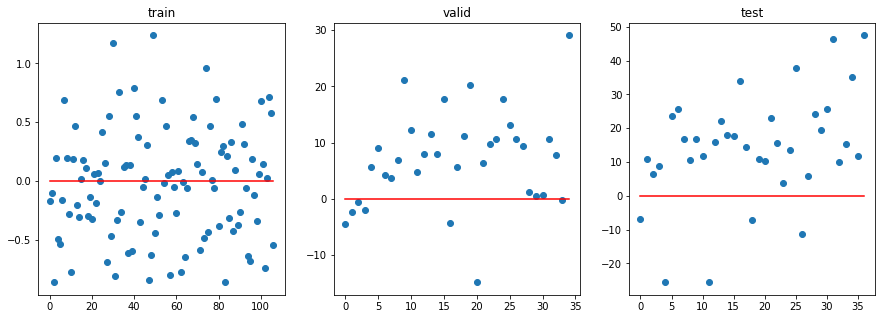

In [134]:
evaluate_sk(x_train, x_val, x_test, feature, XGBRegressor(**result["best_parameters"], random_state=0, eval_set=[(x_train[feature], y_train), (x_val[feature], y_val)], early_stopping_rounds=20))

In [148]:
model = XGBRegressor(random_state=0, 
                     eval_set=[(x_train[feature], y_train), (x_val[feature]), y_val], 
                    early_stopping_rounds=20).fit(train[feature], train[["y"]])
model.save_model("./models/xgb_0902_sel.json")

[17:07:54] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/kooose/.local/lib/python3.8/site-packages/xgboost/sklearn.py:537: UserWarning: kwargs is not saved in Scikit-Learn meta.
  warnings.warn(str(k) + ' is not saved in Scikit-Learn meta.', UserWarning)


In [155]:
from sklearn.model_selection import GridSearchCV 

param = {
    "alpha": [0.1, 0.4, 0.2, 0.7, 1.0],
    "max_iter": [10, 100, 500, 700, 1000],
    "tol": [0.0001, 0.001, 0.01, 0.1, 0.5]
}
scaler = StandardScaler()
train_s = scaler.fit_transform(train)
train_s = pd.DataFrame(train_s, columns=train.columns)

la = Lasso(random_state=0)
grid = GridSearchCV(la, param_grid=param, cv=5).fit(train_s[feature], train[["y"]])

/home/kooose/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2260.8147313379795, tolerance: 7.366142657342655
  model = cd_fast.enet_coordinate_descent(
/home/kooose/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6400.1425433294935, tolerance: 11.258373426573426
  model = cd_fast.enet_coordinate_descent(
/home/kooose/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9115.770907247308, tolerance: 11.912243356643355
  model = cd_fast.enet_coordinate_descent(
/home/kooose/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.p

In [161]:
grid.best_params_

{'alpha': 0.4, 'max_iter': 10, 'tol': 0.1}

In [164]:
la = Lasso(**grid.best_params_, random_state=0).fit(train_s[feature], train[["y"]])

import pickle 
with open("./models/lasso_0902_sel.pkl", "wb") as f:
    pickle.dump(la, f)

### inference  
---

In [165]:
feature

Index(['week', 'soldout', 'kcal', 'event', 'weather', 'precipitation',
       'temperature', 'holiday', 'kcal_isna', 'carry', 'remarks_isna',
       'weather_before1', 'payday_before1', 'payday_after1', 'month',
       'quarter', 'day', 'sale_before1', 'moving_avg', 'temperature_avg'],
      dtype='object')

In [193]:
f_xgb = "./models/xgb_0902_sel.json"
f_la = "./models/lasso_0902_sel.pkl"

model_xgb = XGBRegressor()
model_xgb.load_model(f_xgb)
with open(f_la, "rb") as f:
    model_la = pickle.load(f)
    
train = pd.read_csv("./data/processed/train.csv")
test = pd.read_csv("./data/processed/test.csv")

test["moving_avg"] = 0 
test["sale_before1"] = 0 
train_final_sale = train.loc[206, "y"]
window = train.loc[train.quarter == 3, "moving_avg"].mean()

test["moving_avg"] = window 
test.loc[0, "sale_before1"] = 24

test = test[feature]

In [195]:
def inference(test, model):
    prediction = []
    for i in range(test.shape[0]):
        data = test.loc[i, :].values.reshape(1, -1)
        predict = model.predict(data)
        predict = int(predict[0])
        test.loc[i+1, "sale_before1"] = predict
        prediction.append(predict)
    return prediction 
        
        
pred_xgb = inference(test, model_xgb)

submit = pd.read_csv("./data/raw/test.csv")
submit = submit[["datetime"]]
submit["y"] = pred_xgb 
submit.to_csv("submit_sel.csv", index=False, header=False)

## result: 29.95509459687437